# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Proyecto 2: Resultados Iniciales
### Reto 04: Predicción de compradores recurrentes: cuestionar la línea base - Negocios

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169
- Mario Antonio Guerra Morales, 21008
- David Jonathan Aragon Vasquez, 21053

**Curso:** Data Science  
**Sección:** 10  
**Grupo** 4  

---

Guatemala, 28 de octubre de 2024


##### 🫳 Para la descarga del dataset de este reto, es necesario la creación de una cuenta dentro de Alibaba Cloud. Para facilitar este proceso se proporcionan los elementos a descargar en estos enlaces:
- Data_Format1: https://drive.google.com/file/d/1jgsaSM0wypPMUWaNlXy5s_kO0uiXNzES/view?usp=sharing
- Data_Format2: https://drive.google.com/file/d/1dnMeaon-ovASN2HEI1WSNfnw-7lyINAh/view?usp=drivesdk
- sample_submission.csv:

In [5]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.ticker as ticker
from imblearn.over_sampling import SMOTE

### 📩 Carga de los datos

In [ ]:
dataTrain_timestamp = pd.read_csv('data/dataTrain_balanced_timestamp.csv')
dataTrain = pd.read_csv('data/dataTrain_balanced.csv')

In [ ]:
dataTrain_timestamp.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label,time_stamp
0,0,34176,6.0,0.0,944,408895,1505,7370,1,0,0,0,1,1,-1,"DatetimeIndex(['2023-11-07'], dtype='datetime6..."
1,1,34176,6.0,0.0,412,17235,1604,4396,8,0,0,0,8,7,-1,"DatetimeIndex(['2023-08-18', '2023-08-18', '20..."
2,2,34176,6.0,0.0,1945,231901,662,2758,7,0,0,0,7,3,-1,"DatetimeIndex(['2023-08-18', '2023-08-18', '20..."
3,3,34176,6.0,0.0,4752,174142,821,6938,1,0,0,0,1,1,-1,"DatetimeIndex(['2023-10-27'], dtype='datetime6..."
4,4,34176,6.0,0.0,643,716371,1505,968,0,0,0,1,1,1,-1,"DatetimeIndex(['2023-10-24'], dtype='datetime6..."


In [ ]:
dataTrain.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,0,34176,6.0,0.0,944,408895,1505,7370,1,0,0,0,1,1,-1
1,1,34176,6.0,0.0,412,17235,1604,4396,8,0,0,0,8,7,-1
2,2,34176,6.0,0.0,1945,231901,662,2758,7,0,0,0,7,3,-1
3,3,34176,6.0,0.0,4752,174142,821,6938,1,0,0,0,1,1,-1
4,4,34176,6.0,0.0,643,716371,1505,968,0,0,0,1,1,1,-1


In [ ]:
print("Data Train Timestamp\n")
dataTrain_timestamp.info()
dataTrain_timestamp.count()

print("\nData Train without Timestamp\n")
dataTrain.info()
dataTrain.count()

Data Train Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   user_id            int64  
 2   age_range          float64
 3   gender             float64
 4   merchant_id        int64  
 5   item_id            int64  
 6   category_id        int64  
 7   brand_id           int64  
 8   clicks             int64  
 9   add_to_cart        int64  
 10  purchases          int64  
 11  add_to_favorites   int64  
 12  total_actions      int64  
 13  unique_item_count  int64  
 14  label              int64  
 15  time_stamp         object 
dtypes: float64(2), int64(13), object(1)
memory usage: 2.4+ GB

Data Train without Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 

,0
Unnamed: 0.1,20300811
user_id,20300811
age_range,20300811
gender,20300811
merchant_id,20300811
item_id,20300811
category_id,20300811
brand_id,20300811
clicks,20300811
add_to_cart,20300811


In [ ]:
dataTrain.describe()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
count,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07
mean,3.513824e+06,2.116874e+05,3.037811e+00,3.359498e-01,2.512599e+03,5.559079e+05,8.667681e+02,4.163890e+03,8.630119e+00,5.517021e-06,9.027854e-01,3.033002e-01,1.008873e+01,4.353554e+00,0.000000e+00
std,2.027742e+06,1.215602e+05,1.710790e+00,4.892762e-01,1.287225e+03,3.217158e+05,3.902042e+02,2.163676e+03,2.279894e+01,2.410922e-03,8.730307e-01,1.382527e+00,2.359851e+01,8.344923e+00,8.164966e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.765179e+06,1.056220e+05,2.000000e+00,0.000000e+00,1.480000e+03,2.750960e+05,5.960000e+02,2.368000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,-1.000000e+00
50%,3.513432e+06,2.122770e+05,3.000000e+00,0.000000e+00,2.492000e+03,5.548880e+05,8.490000e+02,4.073000e+03,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00
75%,5.261091e+06,3.166630e+05,4.000000e+00,7.078987e-01,3.596000e+03,8.307000e+05,1.180000e+03,5.910000e+03,9.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.000000e+00
max,7.030722e+06,4.241700e+05,8.000000e+00,2.000000e+00,4.995000e+03,1.113166e+06,1.671000e+03,8.477000e+03,6.962000e+03,2.000000e+00,2.020000e+02,3.980000e+02,6.963000e+03,1.194000e+03,1.000000e+00


## Regresión Logística

<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed indiv

Accuracy: 0.704666290491293
Confusion Matrix:
[[1330616    4859   18408]
 [  98413  868768  385856]
 [  50727  640840  661676]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94   1353883
           0       0.57      0.64      0.61   1353037
           1       0.62      0.49      0.55   1353243

    accuracy                           0.70   4060163
   macro avg       0.70      0.70      0.70   4060163
weighted avg       0.70      0.70      0.70   4060163



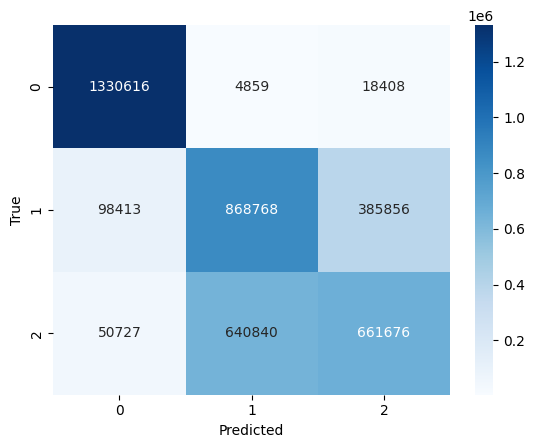

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Función para reducir el uso de memoria ajustando los tipos de datos
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                df[col] = df[col].astype(np.float32)

    return df

# Definir el tamaño del chunk
chunk_size = 100000  # Puedes ajustar este tamaño según tu memoria disponible

# Leer el dataset por fragmentos y procesarlo
data_chunks = pd.read_csv('data/dataTrain_balanced_timestamp.csv', chunksize=chunk_size, usecols=[
    'user_id', 'age_range', 'gender', 'merchant_id', 'item_id', 'category_id',
    'brand_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites',
    'total_actions', 'unique_item_count', 'label', 'time_stamp'
])

# Lista para almacenar los chunks procesados
data_list = []

for chunk in data_chunks:
    # Reducir el uso de memoria en cada chunk
    chunk = reduce_mem_usage(chunk)

    # Convertir la columna 'time_stamp' a tipo datetime
    chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')

    # Codificar las columnas categóricas con LabelEncoder
    le = LabelEncoder()
    chunk['gender'] = le.fit_transform(chunk['gender'].astype(str))
    chunk['age_range'] = le.fit_transform(chunk['age_range'].astype(str))

    # Agregar el chunk procesado a la lista
    data_list.append(chunk)

# Concatenar todos los chunks procesados
dataTrain_timestamp = pd.concat(data_list, axis=0)

# Definir características (X) y etiqueta (y)
X = dataTrain_timestamp.drop(columns=['label', 'time_stamp'])  # Excluir 'label' y 'time_stamp'
y = dataTrain_timestamp['label']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instanciar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir resultados
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Redes Neuronales (LSTM y GRU)

In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import matplotlib.pyplot as plt

# Función para reducir el uso de memoria ajustando los tipos de datos
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                df[col] = df[col].astype(np.float32)
    return df

# Carga y preprocesamiento de datos
chunk_size = 100000
data_chunks = pd.read_csv('data/dataTrain_balanced_timestamp.csv', chunksize=chunk_size, usecols=[
    'user_id', 'age_range', 'gender', 'merchant_id', 'item_id', 'category_id',
    'brand_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites',
    'total_actions', 'unique_item_count', 'label', 'time_stamp'
])

data_list = []
for chunk in data_chunks:
    chunk = reduce_mem_usage(chunk)
    chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
    le = LabelEncoder()
    chunk['gender'] = le.fit_transform(chunk['gender'].astype(str))
    chunk['age_range'] = le.fit_transform(chunk['age_range'].astype(str))
    data_list.append(chunk)

dataTrain_timestamp = pd.concat(data_list, axis=0)
dataTrain_timestamp = dataTrain_timestamp.sort_values(by=['user_id', 'time_stamp'])

X = dataTrain_timestamp.drop(columns=['label', 'time_stamp'])
y = dataTrain_timestamp['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

sequence_length = 10
X_seq, y_seq = [], []
for i in range(len(X) - sequence_length):
    X_seq.append(X[i:i + sequence_length])
    y_seq.append(y.iloc[i + sequence_length])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


<ipython-input-8-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-8-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-8-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-8-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individua

In [ ]:
# Definición y entrenamiento del modelo
model_lstm_optimized = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(16),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_lstm_optimized.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Guardar el modelo y el escalador
model_lstm_optimized.save('model_lstm_optimized.h5')
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, X_train.shape[-1]))  # Escalar solo con el entrenamiento
joblib.dump(scaler, 'scalerLSTM.pkl')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
126880/126880 ━━━━━━━━━━━━━━━━━━━━ 1131s 9ms/step - accuracy: 0.4443 - loss: -54682.5156 - val_accuracy: 0.4400 - val_loss: -463738.1562
Epoch 2/5
126880/126880 ━━━━━━━━━━━━━━━━━━━━ 1123s 9ms/step - accuracy: 0.4303 - loss: -736282.8750 - val_accuracy: 0.4264 - val_loss: -1796306.1250
Epoch 3/5
126880/126880 ━━━━━━━━━━━━━━━━━━━━ 1128s 9ms/step - accuracy: 0.4195 - loss: -2284455.5000 - val_accuracy: 0.4233 - val_loss: -3991701.7500
Epoch 4/5
126880/126880 ━━━━━━━━━━━━━━━━━━━━ 1115s 9ms/step - accuracy: 0.4169 - loss: -4694929.5000 - val_accuracy: 0.3463 - val_loss: -7049976.5000
Epoch 5/5
126880/126880 ━━━━━━━━━━━━━━━━━━━━ 1115s 9ms/step - accuracy: 0.4142 - loss: -7965028.0000 - val_accuracy: 0.4299 - val_loss: -10969651.0000


['scaler.pkl']

In [ ]:
import numpy as np
import json
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

# Cargar el modelo y el escalador
model = load_model('model_lstm_optimized.h5')
scaler = joblib.load('scalerLSTM.pkl')

# Mapear -1 a 0 en y_test
y_test = np.where(y_test == -1, 0, y_test)

X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)  # Escalar X_test
y_pred_proba = model_lstm_optimized.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# Guardar y_test, y_pred y y_pred_proba en un archivo CSV
predictions_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'y_pred_proba': y_pred_proba
})
predictions_df.to_csv('predictionsLSTM.csv', index=False)

# Guardar historial de entrenamiento completo
training_history = {
    "accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open('training_historyLSTM.json', 'w') as f:
    json.dump(training_history, f)

# Guardar métricas detalladas para cada época
metrics_per_epoch = {
    "f1_score": [f1_score(y_test, (y_pred_proba > threshold).astype(int), average='binary') for threshold in np.linspace(0.1, 0.9, 9)],
    "recall": [recall_score(y_test, (y_pred_proba > threshold).astype(int), average='binary') for threshold in np.linspace(0.1, 0.9, 9)],
    "accuracy": [accuracy_score(y_test, (y_pred_proba > threshold).astype(int)) for threshold in np.linspace(0.1, 0.9, 9)],
    "auc": roc_auc_score(y_test, y_pred_proba)
}

with open('metricsLSTM.json', 'w') as f:
    json.dump(metrics_per_epoch, f)

126881/126881 ━━━━━━━━━━━━━━━━━━━━ 329s 3ms/step


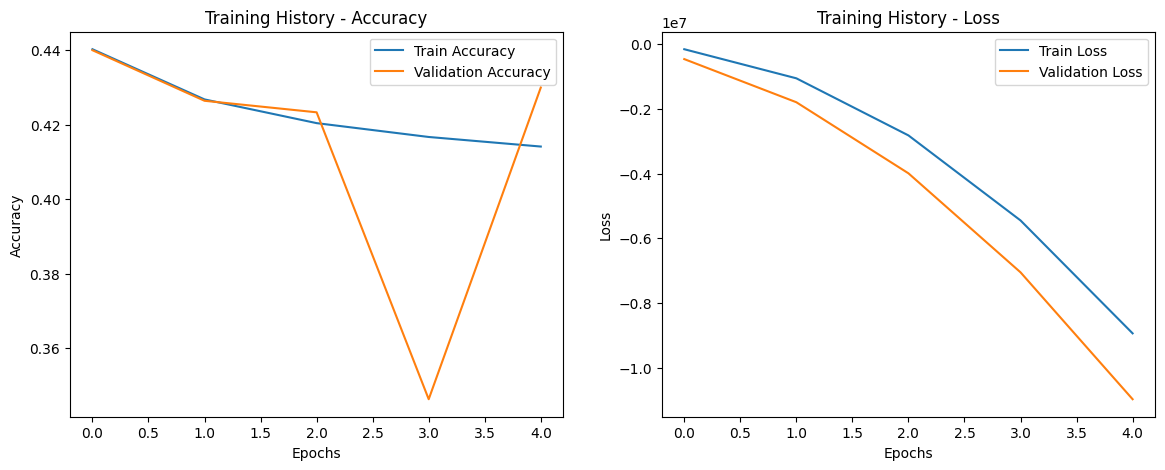

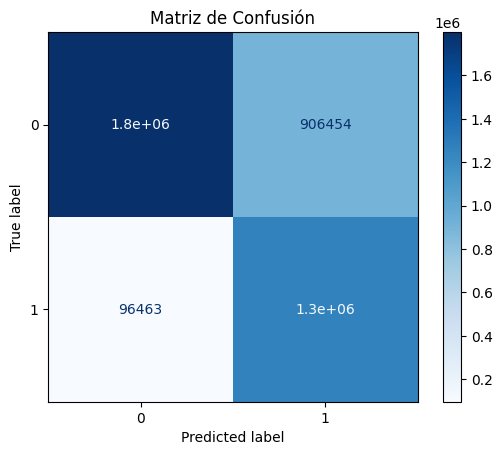

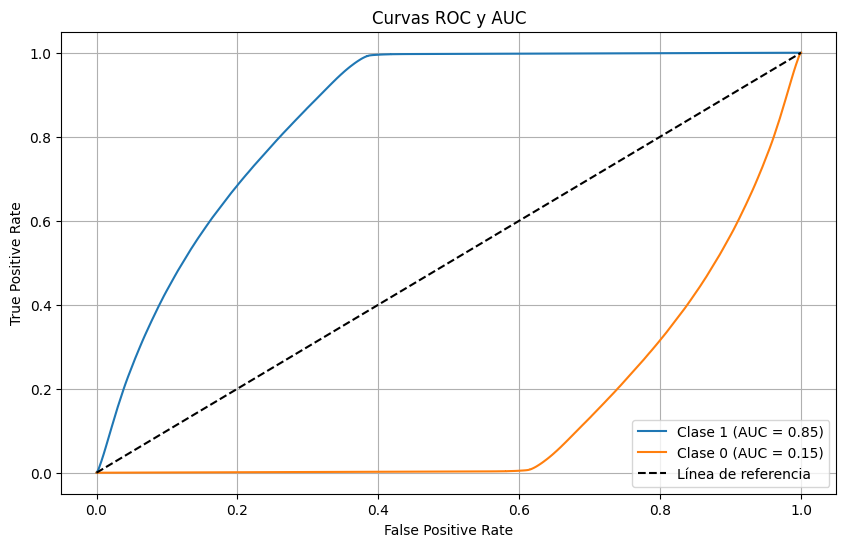

Reporte de Clasificación:
 {
    "Clase 0": {
        "precision": 0.9491212802092893,
        "recall": 0.6650121529336853,
        "f1-score": 0.7820632086383995,
        "support": 2705931.0
    },
    "Clase 1": {
        "precision": 0.5811638460212705,
        "recall": 0.928769116029035,
        "f1-score": 0.7149549617146864,
        "support": 1354230.0
    },
    "accuracy": 0.7529859037609592,
    "macro avg": {
        "precision": 0.76514256311528,
        "recall": 0.7968906344813602,
        "f1-score": 0.748509085176543,
        "support": 4060161.0
    },
    "weighted avg": {
        "precision": 0.8263924041621472,
        "recall": 0.7529859037609592,
        "f1-score": 0.7596798594974418,
        "support": 4060161.0
    }
}


In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model
import joblib
import numpy as np
import pandas as pd

# Cargar predicciones desde predictionsLSTM.csv
predictions_df = pd.read_csv('predictionsLSTM.csv')
y_test = predictions_df['y_test'].values
y_pred = predictions_df['y_pred'].values
y_pred_proba = predictions_df['y_pred_proba'].values

# Función para graficar el historial de entrenamiento desde el archivo
def plot_training_history_from_file(history_data, title="Training History"):
    plt.figure(figsize=(14, 5))

    # Gráfica de precisión
    plt.subplot(1, 2, 1)
    plt.plot(history_data['accuracy'], label='Train Accuracy')
    plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Gráfica de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history_data['loss'], label='Train Loss')
    plt.plot(history_data['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Cargar y graficar el historial desde el archivo guardado
with open('training_historyLSTM.json', 'r') as f:
    training_history = json.load(f)
plot_training_history_from_file(training_history)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Gráfica de la curva ROC y AUC con la inversa
def plot_roc_with_inverse(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    fpr_inverse = 1 - fpr
    tpr_inverse = 1 - tpr
    roc_auc_inverse = 1 - roc_auc

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Clase 1 (AUC = {roc_auc:.2f})')
    plt.plot(fpr_inverse, tpr_inverse, label=f'Clase 0 (AUC = {roc_auc_inverse:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Línea de referencia")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC y AUC')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

plot_roc_with_inverse(y_test, y_pred_proba)

# Guardar reporte de clasificación completo
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], output_dict=True)
with open('classification_reportLSTM.json', 'w') as f:
    json.dump(report, f)

# Mostrar reporte en pantalla
print("Reporte de Clasificación:\n", json.dumps(report, indent=4))

In [2]:
# Función de preprocesamiento y predicción
def preprocess_and_predict(new_data, scaler, model):
    # Escalar los datos
    new_data_scaled = scaler.transform(new_data)
    new_sequences = []

    # Crear secuencias
    sequence_length = 10  # Mismo que en el entrenamiento
    for i in range(len(new_data_scaled) - sequence_length + 1):
        new_sequences.append(new_data_scaled[i:i + sequence_length])

    new_sequences = np.array(new_sequences)

    # Hacer predicciones
    predictions = model.predict(new_sequences)
    return predictions

In [ ]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Cargar el modelo y el escalador
model = load_model('model_lstm_optimized.h5')
scaler = joblib.load('scalerLSTM.pkl')

# Cargar y preparar los datos desde el archivo CSV
file_path = 'dataideaLSTM.csv'  # Cambia esta ruta si el archivo está en otro lugar
data = pd.read_csv(file_path)

# Seleccionar las columnas requeridas
required_columns = ['age_range', 'gender', 'clicks', 'add_to_cart', 'purchases', 
                    'add_to_favorites', 'total_actions', 'unique_item_count', 
                    'user_id', 'merchant_id', 'item_id', 'category_id', 'brand_id']
data = data[required_columns]

# Convertir a array numpy antes de escalar
data_array = data.to_numpy()

# Escalar los datos
data_scaled = scaler.transform(data_array)

# Crear secuencias de longitud adecuada (10 pasos)
sequence_length = 10
sequences = []
for i in range(len(data_scaled) - sequence_length + 1):
    sequences.append(data_scaled[i:i + sequence_length])

# Convertir a numpy array para la predicción
sequences = np.array(sequences)

# Realizar predicciones solo si hay secuencias suficientes
if len(sequences) > 0:
    predictions = model.predict(sequences)

    # Interpretar y mostrar los resultados
    print("Resultados de predicción:")
    for pred in predictions:
        result = "Recurrente" if pred >= 0.5 else "No recurrente"
        print(result)
else:
    print("No hay suficientes datos para generar secuencias de longitud", sequence_length)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Resultados de predicción:
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
No recurrente
